### Installation of Packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import re

### Loading and Initial Exploration

- Loads the dataset and prints its column names.

In [57]:
df = pd.read_csv('android_malware.csv')
df.head()


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [58]:
df.shape

(4465, 242)

In [59]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB


### Label Encoding

- Encodes the Label column (e.g., "malware" and "benign") into binary values (1 for malware, 0 for benign)
- Renames the column to *is_malware*

In [60]:
# Encode labels
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df = df.rename(columns={'Label': 'is_malware'})
print(f"There are {df.shape[0]} datapoints")

There are 4465 datapoints


In [61]:
df.describe()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,is_malware
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4465.000000
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.173163,0.245520,0.215950,0.091622,0.088710,0.056228,0.133065,0.013665,0.150090,0.798880
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.378431,0.430443,0.411526,0.288524,0.284356,0.230387,0.339682,0.116108,0.357199,0.401441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### Remove Rows with Missing Values

- Drops rows containing *NaN* values.

In [62]:
# Remove rows with NaN values
null_rows_idx = df[df.isnull().any(axis=1)].index
df = df.drop(null_rows_idx)


### Remove Deprecated Features

- Removes features (columns) that are deprecated in Android.

In [63]:
# Remove deprecated features
deprecated_items = ['READ_INPUT_STATE']
df = df.drop(deprecated_items, axis=1, errors='ignore')

### Remove Features with All False or All True Values

- Drops features that don't provide useful information (constant values).

In [64]:
# Remove features with all False or all True values
features_to_remove = []
for column in df.columns:
    if (df[column] == False).all() or (df[column] == True).all():
        features_to_remove.append(column)
df = df.drop(features_to_remove, axis=1)

print(f"There are {len(features_to_remove)} features with all False or all True values")

There are 42 features with all False or all True values




### Summary of the Data:
- Check for class imbalances

- Prints the number of malware and benign samples, along with the final feature count.


In [65]:
# Check for class imbalance
print(df['is_malware'].value_counts())
# Rebalance dataset using SMOTE if imbalanced
X = df.drop(['is_malware'], axis=1)
y = df['is_malware']
smote = SMOTE(random_state=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

malware_datapoints = df[df['is_malware'] == 1].shape[0]
benign_datapoints = df[df['is_malware'] == 0].shape[0]

print(f"There are {malware_datapoints} malware and {benign_datapoints} benign datapoints")
print(f"There are {len(df.columns) - 1} features after preprocessing")

is_malware
1    3565
0     899
Name: count, dtype: int64
There are 3565 malware and 899 benign datapoints
There are 198 features after preprocessing


In [66]:
# Check new class distribution
print(pd.Series(y_resampled).value_counts())

is_malware
1    3565
0    3565
Name: count, dtype: int64


### Permission and Feature Usage

- Calculates how frequently each permission/feature is used.

Most used features in the dataset


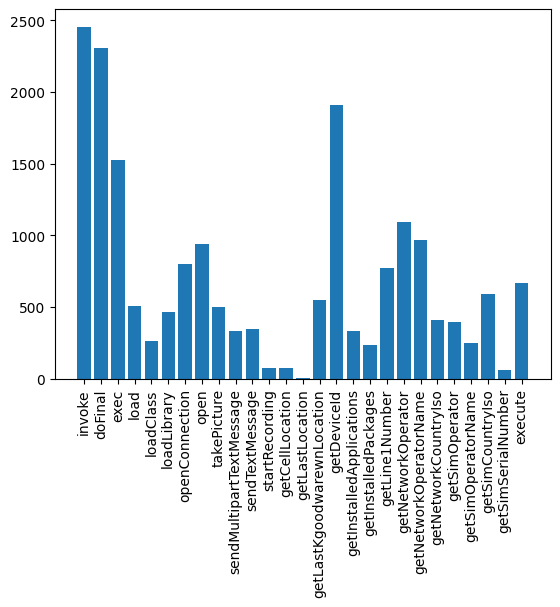

Most frequently requested permissions by apps


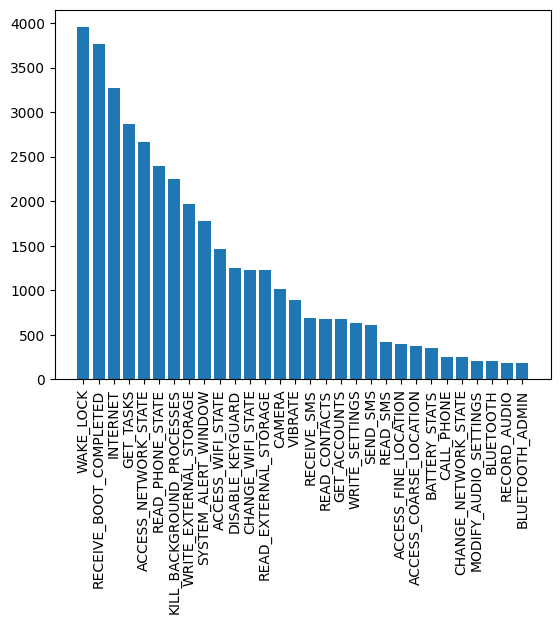

In [67]:
permissions = {}
most_used_permissions = {}
features = {}
features_num = 27

for column in df.columns.drop('is_malware')[-features_num:]:
    features[column] = df[column].sum()

for column in df.columns.drop('is_malware')[:-27]:
    permissions[column] = df[column].sum()

# For features let's remove everything except method name
features = {re.sub(r'^.*?->', '->', k).replace("->", ""): v for k, v in features.items()}
print("Most used features in the dataset")
plt.bar(features.keys(), features.values())
plt.xticks(rotation=90)
plt.show()

# there are too many permissions, so let's take 30 most used (biggest values)
most_used_permissions = dict(sorted(permissions.items(),
                                    key=lambda dict_item: dict_item[1],
                                    reverse=True)[:30])
print("Most frequently requested permissions by apps")
plt.bar(most_used_permissions.keys(), most_used_permissions.values())
plt.xticks(rotation=90)
plt.show()

In [68]:
# Retain only the top 30 permissions and features
top_permissions = list(most_used_permissions.keys())
X_reduced = X_resampled[top_permissions]

### PCA Analysis

- Reduces the dataset to `N` principal components, retaining the most significant features.


In [69]:
# Simplify features using PCA
pca = PCA()
pca.fit(X_resampled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [70]:
# Determine the optimal number of components
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

# Update PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
X_resampled_reduced = pca.fit_transform(X_resampled)

Optimal number of components to retain 95% variance: 43


### Train-Test 

- Splits the dataset into training (70%) and testing (30%) sets.


In [71]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_reduced, y_resampled, test_size=0.30, random_state=3)


### Enhanced Validation with Cross-Validation

In [72]:
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=3, max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=3, max_depth=10),
    "SVM": SVC(kernel='rbf', random_state=3, probability=True, C=1.0)
}

results = []
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Cross-Validation Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision
    })

In [73]:
# Create DataFrame for results
results_df = pd.DataFrame(results)
print(results_df)

           Model  Cross-Validation Accuracy  Test Accuracy    Recall  \
0  Decision Tree                   0.979364       0.982235  0.982309   
1  Random Forest                   0.991384       0.994857  0.989758   
2            SVM                   0.992186       0.995325  0.991620   

   Precision  
0   0.982309  
1   1.000000  
2   0.999062  


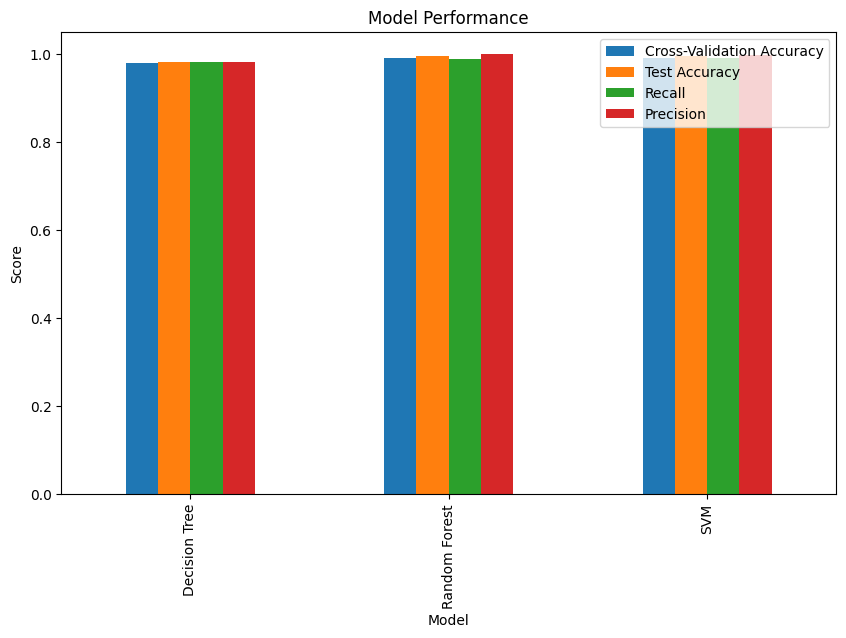

In [74]:
# Visualize Metrics
results_df.plot(x="Model", kind="bar", figsize=(10, 6), title="Model Performance", ylabel="Score")
plt.show()